# 3章

パッケージのロード

In [ ]:
rm(list=ls()); gc();  gc(); #前の作業など，rのメモリに入っているものをリセットするコマンド
if (!require("pacman")) install.packages("pacman") #パッケージ管理用のパッケージであるpacmanが入っていない場合はインストール
pacman::p_load(tidyverse, magrittr) 

## 問題3.1

2つの確率変数X,Yについて，XとYが独立であるとき

### 1. $\textrm{Var}(X+Y)$

$$
\begin{split}
Var(X+Y) &= Cov(X+Y)(X+Y) \\
&=Cov(X,X)+Cov(Y,Y)+2Cov(X,Y) \\
&= Var(X) + Var(Y)
\end{split}
$$

### 2. $\textrm{Var}(X-Y)$

$Z = -Y$とすると，

$$
Var(Z) = Var(-Y) = (-1)^2Var(Y) = Var(Y)
$$

これを利用して

$$\begin{split}
Var(X+Z) &= Cov(X+Z)(X+Z) \\
&=Cov(X,X)+Cov(Y,Y)+2Cov(X,Z) \\
&= Var(X) + Var(Z) \\
&= Var(X) + Var(Y)
\end{split}$$

## 問題 3.2

データの読み込み

In [ ]:
tempdata <- read_csv("R_EmpiricalAnalysis_csv/chap03/temperature.csv")

1.  項目`temp`の全てを用いて，2014年の東京都の平均気温を計算

In [ ]:
tempdata %$% 
  mean(temp)

[1] 16.64065

1.  抽出し，計算

In [ ]:
sub <- tempdata %>% 
  slice(1:100) #slice:データを指定の範囲で切り取る
mean(sub$temp)

[1] 7.204

1.  ランダム抽出

In [ ]:
sub2 <- tempdata %>% 
  slice_sample(n = 100)
mean(sub2$temp)

[1] 17.247

## 問題3.3

In [ ]:
icedata <- read_csv("R_EmpiricalAnalysis_csv/chap03/icecream.csv")

1

In [ ]:
icedata %>% 
  dplyr::select(city,icecream) %>% 
  arrange(-icecream)

# A tibble: 49 × 2
   city     icecream
   <chr>       <dbl>
 1 富山市      10059
 2 金沢市       9855
 3 浜松市       9854
 4 鹿児島市     9776
 5 宇都宮市     9706
 6 福井市       9443
 7 川崎市       9399
 8 京都市       9344
 9 相模原市     9161
10 山形市       8842
# ℹ 39 more rows

In [ ]:
icedata%$%
  which.max(icecream) 

[1] 17

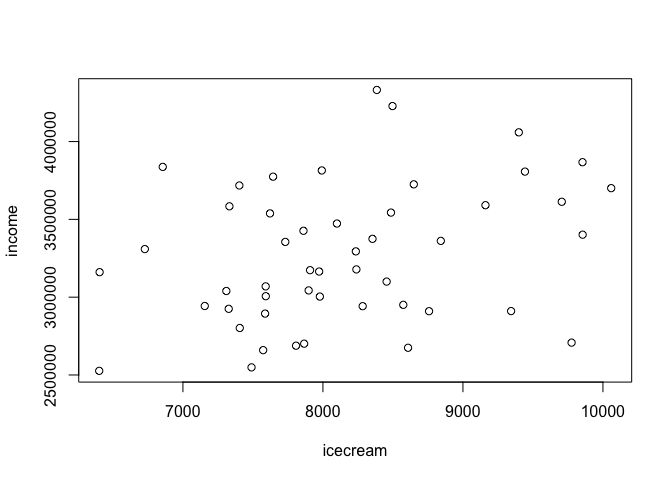

[1] 0.3113555

In [ ]:
icedata %$%
  plot(icecream,income)  

## 問題3.4

1

In [ ]:
S <- 1000
X <- rnorm(S, 50, 10)
rec <- numeric(S)

for(i in 1:S){
  rec[i] <- (10 < X[i])
}
mean(rec)

[1] 1

2

In [ ]:
S <- 1000
X <- rnorm(S, 50, 10)
rec <- numeric(S)

for(i in 1:S){
  rec[i] <- (-10 < X[i]) & (X[i] < 10)
}
mean(rec)

[1] 0

3

In [ ]:
S <- 1000
X <- rnorm(S, 50, 10)
Y <- rnorm(S, 50, 10)

rec <- numeric(S)

for(i in 1:S){
  rec[i] <- (Y[i])^2 < X[i]
}
mean(rec)

[1] 0

## 問題3.5

In [ ]:
S <- 10000
N <- 10000

rec <- numeric(S)

for(i in 1:S){
  X <- rnorm(N,50,10)
  Xbar <- mean(X)
  Vn <- var(X)
  lb <- Xbar - 1.64 * sqrt(Vn / N) 
  ub <- Xbar + 1.64 * sqrt(Vn / N)
  rec[i] <- (lb < 50) & (ub > 50) 
  
}
mean(rec)

[1] 0.8974